# Final Project - Part 2

Prompt:
Submit in a Jupyter notebook.

Identify a dataset to explore.
This will be iterative! You probably won't get one you like on the first try.
Check out sources like data.world, data.illinois.gov, data.gov,developer.marvel.com, IDB, etc.
or the dataset doc that lives right here
Explore the dataset in a Jupyter notebook. Make sure you include things that did and did not work. (30 pts)
Summarize the characteristics of the dataset in words: what does it represent, what are the fields/columns/rows, what data types are they, etc (30 pts)
Your datasets need to be submitted as well. To do this, include this information in your Jupyter notebook (40 pts):

What is the "name" of the dataset?
Where did you obtain it?
Where can we obtain it? (i.e., URL)
What is the license of the dataset? What are we allowed to do with it?
How big is it in file size and in items?
Make a simple plot showing a relationship of interest. You can use matplotlib or pandas (or other). Don't worry about colors, labels or anything else of that nature!

# Introduction

Project aims to perform Exploratory Data Analysis using WordCloud in Python. Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. Word clouds are widely used for analyzing data from social network websites.


Name: Wine Reviews

Source: Kaggle

Source URL: https://www.kaggle.com/datasets/zynicide/wine-reviews

License: Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0)

You are free to:

Share — copy and redistribute the material in any medium or format

Adapt — remix, transform, and build upon the material

Size of the Data: 52.91 MB

Number of Items: The file consists of 10 columns with 130k rows of wine reviews.

# Lets begin with dataset exploration

At first, load the dataset and necessary libraries

In [1]:
# !pip install panel
# !pip install wordcloud
# !pip install PIL
# !pip install seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets
import matplotlib.gridspec as gridspec
import panel as pn
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from collections import Counter
from numpy import nan
import seaborn as sns

In [2]:
df = pd.read_csv("winemag-data-130k-v2.csv")
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
df = pd.read_csv("winemag-data-130k-v2.csv", index_col=0)

# using index_col=0 meaning that don't read in row name (index) as a separated column

In [4]:
#Column/filed names
list(df.columns)

['country',
 'description',
 'designation',
 'points',
 'price',
 'province',
 'region_1',
 'region_2',
 'taster_name',
 'taster_twitter_handle',
 'title',
 'variety',
 'winery']

In [5]:
#datatypes
df.dtypes

country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

In [6]:
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


Consider columns like the make of wine in terms of country and description along with the score received.

In [7]:
df[["country", "description","points"]]

,country,description,points
0,Italy,"Aromas include tropical fruit, broom, brimston...",87
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87
2,US,"Tart and snappy, the flavors of lime flesh and...",87
3,US,"Pineapple rind, lemon pith and orange blossom ...",87
4,US,"Much like the regular bottling from 2012, this...",87
...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,90
129967,US,Citation is given as much as a decade of bottl...,90
129968,France,Well-drained gravel soil gives this wine its c...,90
129969,France,"A dry style of Pinot Gris, this is crisp with ...",90


Using groupby() for grouping the features. This will help in making comparisions. 

In [8]:
country = df.groupby("country")
country.describe()

points                                          \
                          count       mean       std   min    25%   50%   
country                                                                   
Argentina                3800.0  86.710263  3.179627  80.0  84.00  87.0   
Armenia                     2.0  87.500000  0.707107  87.0  87.25  87.5   
Australia                2329.0  88.580507  2.989900  80.0  87.00  89.0   
Austria                  3345.0  90.101345  2.499799  82.0  88.00  90.0   
Bosnia and Herzegovina      2.0  86.500000  2.121320  85.0  85.75  86.5   
Brazil                     52.0  84.673077  2.340782  80.0  83.00  85.0   
Bulgaria                  141.0  87.936170  2.077817  80.0  87.00  89.0   
Canada                    257.0  89.369650  2.384752  82.0  88.00  90.0   
Chile                    4472.0  86.493515  2.692959  80.0  85.00  86.0   
China                       1.0  89.000000       NaN  89.0  89.00  89.0   
Croatia                    73.0  87.219178  2.399344  81.0  86.00  88.0   
Cyprus                     11.0  87.181818  1.601136  85.0  86.00  87.0   
Czech Republic             12.0  87.250000  1.712255  84.0  86.50  88.0   
Egypt                       1.0  84.000000       NaN  84.0  84.00  84.0   
England                    74.0  91.581081  1.843216  89.0  90.00  91.0   
France                  22093.0  88.845109  3.044423  80.0  87.00  89.0   
Georgia                    86.0  87.686047  2.087845  82.0  87.00  88.0   
Germany                  2165.0  89.851732  2.469351  81.0  88.00  90.0   
Greece                    466.0  87.283262  2.185293  82.0  86.00  87.0   
Hungary                   146.0  89.191781  2.686659  81.0  88.00  89.0   
India                       9.0  90.222222  1.715938  87.0  90.00  90.0   
Israel                    505.0  88.471287  2.478412  80.0  87.00  89.0   
Italy                   19540.0  88.562231  2.649756  80.0  87.00  88.0   
Lebanon                    35.0  87.685714  2.784109  82.0  86.50  88.0   
Luxembourg                  6.0  88.666667  0.816497  88.0  88.00  88.5   
Macedonia                  12.0  86.833333  1.749459  84.0  85.75  87.0   
Mexico                     70.0  85.257143  2.722348  80.0  83.00  85.0   
Moldova                    59.0  87.203390  2.419601  82.0  86.00  88.0   
Morocco                    28.0  88.571429  1.687175  85.0  88.00  88.5   
New Zealand              1419.0  88.303030  2.435008  80.0  87.00  88.0   
Peru                       16.0  83.562500  1.860779  80.0  82.00  84.0   
Portugal                 5691.0  88.250220  2.996122  80.0  86.00  88.0   
Romania                   120.0  86.400000  1.716945  82.0  85.00  86.0   
Serbia                     12.0  87.500000  1.314257  86.0  86.00  87.5   
Slovakia                    1.0  87.000000       NaN  87.0  87.00  87.0   
Slovenia                   87.0  88.068966  1.730661  82.0  87.00  88.0   
South Africa             1401.0  88.056388  2.435826  82.0  86.00  88.0   
Spain                    6645.0  87.288337  3.066284  80.0  85.00  87.0   
Switzerland                 7.0  88.571429  2.507133  83.0  89.00  89.0   
Turkey                     90.0  88.088889  1.975379  84.0  87.00  88.0   
US                      54504.0  88.563720  3.114840  80.0  86.00  88.0   
Ukraine                    14.0  84.071429  1.591530  82.0  83.00  84.0   
Uruguay                   109.0  86.752294  2.687957  80.0  85.00  87.0   

                                        price                              \
                          75%    max    count       mean        std   min   
country                                                                     
Argentina               89.00   97.0   3756.0  24.510117  23.430122   4.0   
Armenia                 87.75   88.0      2.0  14.500000   0.707107  14.0   
Australia               91.00  100.0   2294.0  35.437663  49.049458   5.0   
Austria                 92.00   98.0   2799.0  30.762772  27.224797   7.0   
Bosnia and Herzegovina  87.25   88.

Find top 10 countries having highest points.

In [9]:
country.mean().sort_values(by="points",ascending=False).head(15)

,points,price
country,,
England,91.581081,51.681159
India,90.222222,13.333333
Austria,90.101345,30.762772
Germany,89.851732,42.257547
Canada,89.369650,35.712598
Hungary,89.191781,40.648276
China,89.000000,18.000000
France,88.845109,41.139120
Luxembourg,88.666667,23.333333


Now, lets make boxplots for price and points 


C:\Users\Nemo\AppData\Local\Temp\ipykernel_16608\2100434907.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


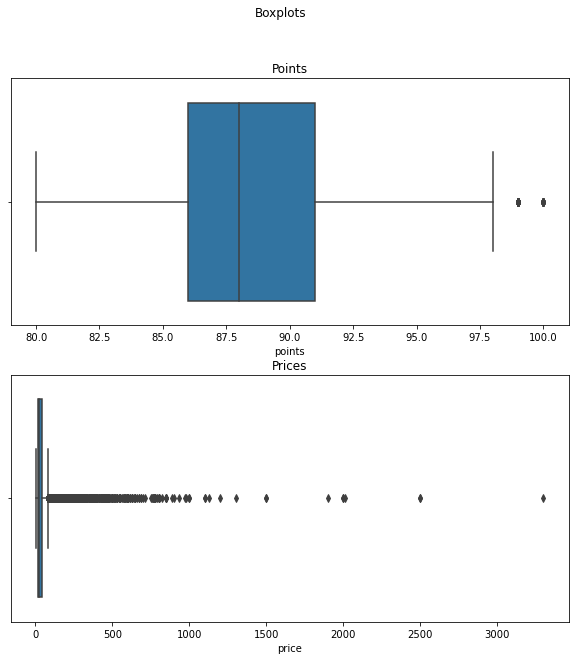

In [10]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharey=True)
fig.suptitle('Boxplots')

sns.boxplot(ax=axes[0], x = df['points']).set_title("Points")

sns.boxplot(ax=axes[1], x = df['price']).set_title("Prices")

fig.show()

Around 75% of the points are within the same range (~ 86 to 91 points), some big outliers in the Prices

Lets plot the total number of wines produced vs country of origin.

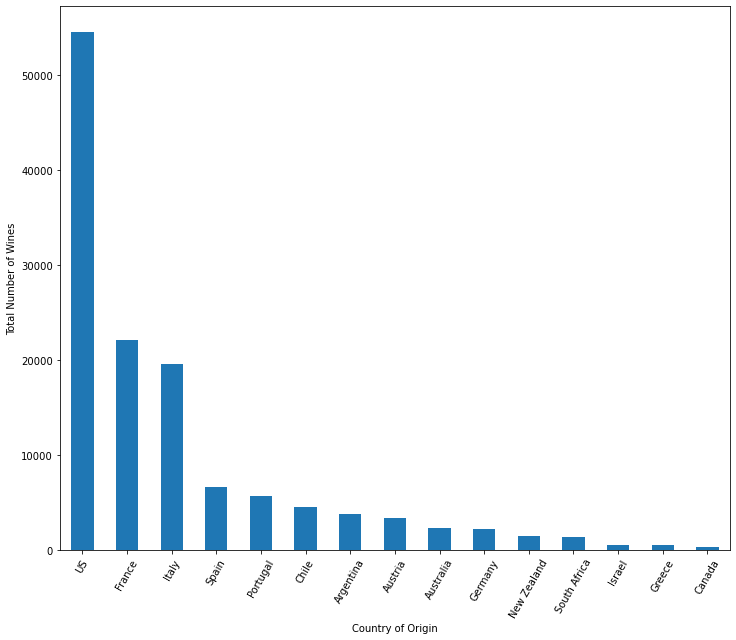

In [11]:
plt.figure(figsize=(12,10))
country.size().sort_values(ascending=False).head(15).plot.bar()
plt.xticks(rotation=60)
plt.xlabel("Country of Origin")
plt.ylabel("Total Number of Wines")
plt.show()

Lets plot the total number of wines produced for every variety of wine.

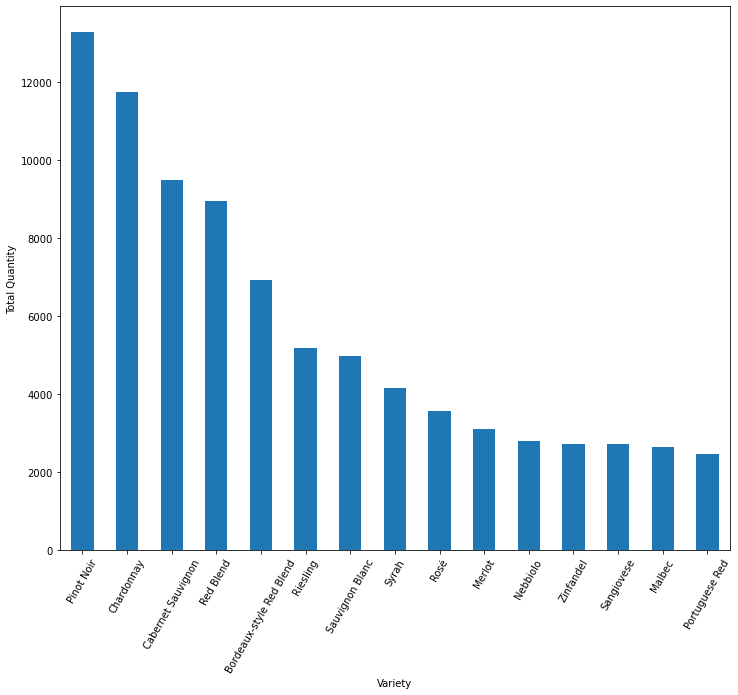

In [12]:
plt.figure(figsize=(12,10))

df['variety'].value_counts().head(15).plot.bar()
plt.xticks(rotation=60)
plt.xlabel("Variety")
plt.ylabel("Total Quantity")
plt.show()

USA & Pinot Noir are on top of the charts.

In [13]:
df_temp = df[["country", "variety"]]
df_temp_group = df_temp.groupby(["country"])
df_temp_group

This is DataFrameGroupBy Object and hence we will use value_counts() method and then convert it to dataframe for neatness and plotting. 

In [14]:
df2_grouped = df_temp_group['variety'].value_counts()
groupby_country_variety = df2_grouped.to_frame()
groupby_country_variety.rename(columns = {'variety':'count'}, inplace = True)
groupby_country_variety

count
country   variety                  
Argentina Malbec               1510
          Cabernet Sauvignon    540
          Chardonnay            295
          Torrontés             245
          Red Blend             234
...                             ...
Uruguay   Merlot                  1
          Sauvignon Blanc         1
          Tannat-Syrah            1
          Tempranillo-Tannat      1
          White Blend             1

[1612 rows x 1 columns]

This looks pretty cool. Right? Now, we will reset index by one level for plotting. 

In [15]:
groupby_country_variety2 = groupby_country_variety.reset_index(level='variety')
groupby_country_variety2

,variety,count
country,,
Argentina,Malbec,1510
Argentina,Cabernet Sauvignon,540
Argentina,Chardonnay,295
Argentina,Torrontés,245
Argentina,Red Blend,234
...,...,...
Uruguay,Merlot,1
Uruguay,Sauvignon Blanc,1
Uruguay,Tannat-Syrah,1


Finding unique list of countries -

In [16]:
unique_countries = groupby_country_variety2.index.unique()
unique_countries = unique_countries.to_list()
unique_countries
# country_varieties = groupby_country_variety2.loc[groupby_country_variety2.index == 'Argentina'] # our subsetted dataframe
# country_varieties.head(15)

['Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Canada',
 'Chile',
 'China',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Egypt',
 'England',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Hungary',
 'India',
 'Israel',
 'Italy',
 'Lebanon',
 'Luxembourg',
 'Macedonia',
 'Mexico',
 'Moldova',
 'Morocco',
 'New Zealand',
 'Peru',
 'Portugal',
 'Romania',
 'Serbia',
 'Slovakia',
 'Slovenia',
 'South Africa',
 'Spain',
 'Switzerland',
 'Turkey',
 'US',
 'Ukraine',
 'Uruguay']

In [17]:
# for country in unique_countries:
#     top15_bycountry = groupby_country_variety2.loc[country].head(15)

In [18]:
mySelectedLabel = ipywidgets.Label() # start with our label

In [19]:
@ipywidgets.interact(country = unique_countries)
def my_geopandas_plot(country):
    country_varieties = groupby_country_variety2.loc[groupby_country_variety2.index == country] # our subsetted dataframe
    country_varieties = country_varieties.head(15)
    plt.figure(figsize=(12,10))
    country_varieties.plot.bar(x='variety', y='count')
    plt.xticks(rotation=90)
    plt.xlabel("variety")
    plt.ylabel("count")
    plt.show()
    

interactive(children=(Dropdown(description='country', options=('Argentina', 'Armenia', 'Australia', 'Austria',…

In [20]:
# top15_bycountry = groupby_country_variety2.loc['Argentina'].head(15)
# top15_bycountry

In [21]:
# plt.figure(figsize=(12,10))

# top15_bycountry.plot.bar(x='variety', y='count')
# #top15_bycountry['count'].plot.bar()

# plt.xticks(rotation=90)
# plt.xlabel("variety")
# plt.ylabel("count")
# plt.show()


The dataset used for generating word cloud is collected from KAGGLE. It consists of wine review dataset taken from Wine Enthusiast website. Word clould generated for this dataset will be quite handy for exploring text data and making lively reports.

DATASET NAME: winemag-data-130k-v2.csv


SOURCE: KAGGLE


DATASET LINK: https://www.kaggle.com/datasets/zynicide/wine-reviews?datasetId=1442&searchQuery=datav


FILE SIZE: 50.4MB

In [22]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

print("There are {} types of wine in this dataset such as {}... \n".format(len(df.variety.unique()),
                                                                           ", ".join(df.variety.unique()[0:5])))

print("There are {} countries producing wine in this dataset such as {}... \n".format(len(df.country.unique()),
                                                                                      ", ".join(df.country.unique()[0:5])))

There are 129971 observations and 13 features in this dataset. 

There are 708 types of wine in this dataset such as White Blend, Portuguese Red, Pinot Gris, Riesling, Pinot Noir... 

There are 44 countries producing wine in this dataset such as Italy, Portugal, US, Spain, France... 



The column names include: country', 'description', 'designation', 'points', 'price', 'province','region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title','variety', 'winery'

The datatypes are:

country                   object,
description               object,
designation               object,
points                     int64,
price                    float64,
province                  object,
region_1                  object,
region_2                  object,
taster_name               object,
taster_twitter_handle     object,
title                     object,
variety                   object,
winery                    object.

# PART 2 - Word Cloud

In [23]:
# Splitting text from description column
all_desc = df.description.str.split(' ')

# Looping through each row and making a list of words
rw = [ word for row in all_desc for word in row]

# Selecting words that have more than 4 characters to display on word cloud
rw4 = [ w for w in rw if len(w) > 4]

# Converting the list to series and counting repeated words
rwSerie = pd.Series(rw4)
rwCounts = rwSerie.value_counts()


# Selecting top 20 repeated words to display
top20 = rwCounts[:20]

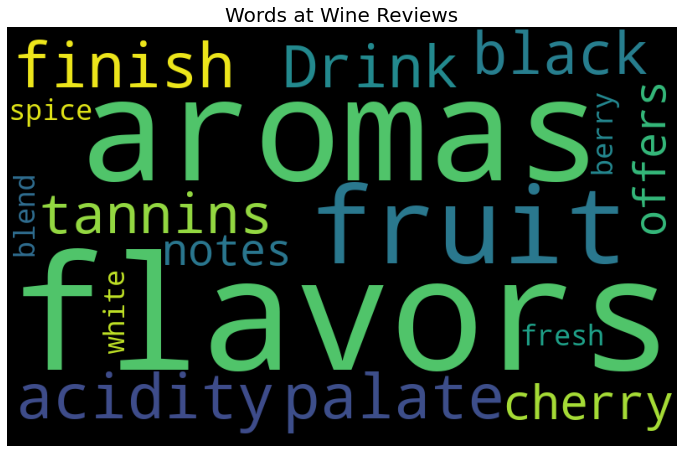

In [24]:
words = ''
for w in top20.index:
    for i in range(top20.loc[w] // 5000):
        words = words + w + ' '

plt.figure(figsize=(12,8))
wc = WordCloud(background_color='black', max_font_size=200,
                            width=800,
                            height=500,
                            max_words=50,
                            relative_scaling=.25).generate(words)
plt.imshow(wc)
plt.title("Words at Wine Reviews", fontsize=20)
plt.axis("off");

In [25]:
df_wc = df[['country','variety','taster_name']]
df_wc.head()

,country,variety,taster_name
0,Italy,White Blend,Kerin O’Keefe
1,Portugal,Portuguese Red,Roger Voss
2,US,Pinot Gris,Paul Gregutt
3,US,Riesling,Alexander Peartree
4,US,Pinot Noir,Paul Gregutt


In [26]:
#df_wc['country'] = df_wc['country'].str.replace(" ","")
#df_wc['variety'] = df_wc['variety'].str.replace(" ","")
#df_wc['taster_name'] = df_wc['taster_name'].str.replace(" ","")
#df_wc.head(20)

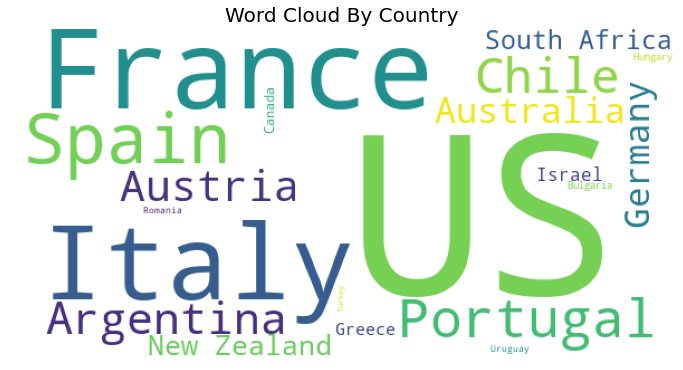

In [27]:
plt.figure(figsize=(12,8))

stopwords = set(STOPWORDS)
stopwords.update(["Name", "Country", "Length", "dtype", "object"])

        
wordcloud_country_dict=Counter(list(df_wc['country']))

wordcloud = WordCloud(background_color='white',
                      stopwords=stopwords,
                      collocations=False,
                      width=600,
                      height=300,
                      max_words=20,
                      max_font_size=200).generate_from_frequencies(wordcloud_country_dict)


plt.imshow(wordcloud)
plt.title("Word Cloud By Country", fontsize=20)
plt.axis("off");

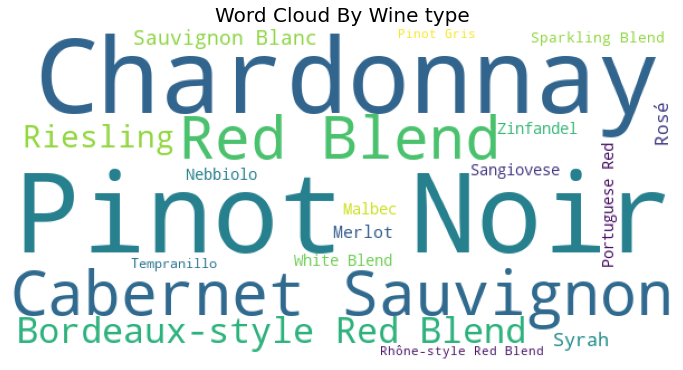

In [28]:
plt.figure(figsize=(12,8))

stopwords = set(STOPWORDS)
stopwords.update(["Name", "Country", "Length", "dtype", "object"])


wordcloud_variety_dict=Counter(list(df_wc['variety']))

wordcloud = WordCloud(background_color='white',
                      stopwords=stopwords,
                      collocations=False,
                      width=600,
                      height=300,
                      max_words=20,
                      max_font_size=200).generate_from_frequencies(wordcloud_variety_dict)


plt.imshow(wordcloud)
plt.title("Word Cloud By Wine type", fontsize=20)
plt.axis("off");

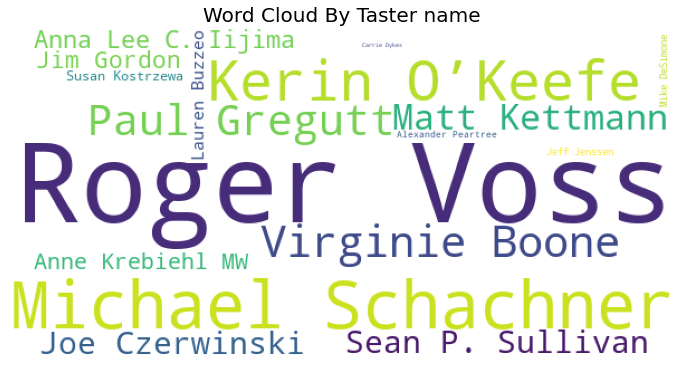

In [29]:
plt.figure(figsize=(12,8))

stopwords = set(STOPWORDS)
stopwords.update(["Name", "Country", "Length", "dtype", "object"])


wordcloud_taster_dict=Counter(list(df_wc['taster_name']))
del wordcloud_taster_dict[nan]

wordcloud = WordCloud(background_color='white',
                      stopwords=stopwords,
                      collocations=False,
                      width=600,
                      height=300,
                      max_words=20,
                      max_font_size=200).generate_from_frequencies(wordcloud_taster_dict)


plt.imshow(wordcloud)
plt.title("Word Cloud By Taster name", fontsize=20)
plt.axis("off");

## Masked Word Cloud

In [30]:
# Checking if masking image has the value '0'

mask = np.array(Image.open("mask.png"))
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [31]:
# Writing Custom function to change 0-> 255

def transform_zeros(val):
    if val == 0:
        return 255
    else:
        return val
    
# Creating a new_mask variable to map values    
new_mask = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)

# Mapping values into new variable after transforming

for i in range(len(mask)):
    new_mask[i] = list(map(transform_zeros, mask[i]))

new_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

In [32]:
@ipywidgets.interact(country = unique_countries)
def my_geopandas_plot(country):
    #all_varieties=df_wc.loc[df_wc['country'] == country, 'variety'].value_counts()
    #top20_variety = all_varieties[:20]
    #top20_variety

    #variety = ''
    #for v in top20_variety.index:
    #    for i in range(top20_variety.loc[v]):
    #        variety = variety + v + ' '
    wordcloud_variety_dict=Counter(list(df_wc.loc[df_wc['country'] == country, 'variety']))

    wc_mask = WordCloud(background_color='white',
                          stopwords=stopwords,
                          collocations=False,
                        colormap = 'Dark2_r',
                        contour_width=2,
                        contour_color='indianred',
                       mask=new_mask).generate_from_frequencies(wordcloud_variety_dict)


    plt.title("Word Cloud For Wine type by Selected Country", fontsize=20)
    plt.imshow(wc_mask)
    plt.axis("off");
    # wc_mask.to_file("variety-mask-wordcloud.png")

interactive(children=(Dropdown(description='country', options=('Argentina', 'Armenia', 'Australia', 'Austria',…

In [33]:
#all_varieties=df_wc.loc[df_wc['country'] == 'Argentina', 'variety'].value_counts()


wordcloud_variety_dict=Counter(list(df_wc.loc[df_wc['country'] == 'Argentina', 'variety']))
wordcloud_variety_dict

Counter({'Malbec': 1510,
         'Torrontés': 245,
         'Bonarda': 105,
         'Chardonnay': 295,
         'Red Blend': 234,
         'Cabernet Sauvignon': 540,
         'Sémillon': 12,
         'Bordeaux-style Red Blend': 89,
         'Pinot Gris': 9,
         'Sauvignon Blanc': 78,
         'Merlot': 59,
         'Pinot Grigio': 27,
         'Rosé': 38,
         'Viognier': 21,
         'White Blend': 32,
         'Rosado': 3,
         'Cabernet Sauvignon-Merlot': 5,
         'Malbec-Tannat': 3,
         'Malbec-Cabernet Franc': 10,
         'Moscato': 11,
         'Tempranillo': 20,
         'Cabernet Franc': 64,
         'Syrah': 57,
         'Cabernet Blend': 8,
         'Pinot Noir': 105,
         'Cabernet Sauvignon-Malbec': 12,
         'Malbec-Cabernet Sauvignon': 56,
         'Nebbiolo': 4,
         'Sparkling Blend': 29,
         'Malbec-Syrah': 16,
         'Syrah-Viognier': 3,
         'Champagne Blend': 8,
         'Merlot-Cabernet Franc': 1,
         'Malbec-Merlo

# DASHBOARD

This is a pretty simple and easy to use dashboard. It is a representation of our dataset which consists of wine reviews taken from Wine Enthusiast website that includes various aspects such as country of origin of the wine, variety of wine, taster name, etc. There is a selection drop down that makes this dashboard interactive. Through this selection, you can pick one out of the three options, i.e. Country, Variety or Taster name to modify the data, which will adapt the x axis and represent the data in the graph and the Word Cloud. For example, when you select Country, the graph represents the count of wine reviews conducted in every country for the top 15 countries and the word cloud represents the top 15 countries as words with the country having maximum reviews being represented in the biggest font. Similarly, the drop down can be modified to select Variety and then the graph and wordcloud shall adapt to represent the reviews of wine by variety and same with the taster name.

In [34]:
# Function to generate both the graphs
def create_figure(x_column):
    
#     x_column = 'country'
#     x_label = 'Country of Origin'
    updated_df = pd.DataFrame(df).groupby(x_column).agg({'description':"count"}).sort_values(by = ['description'], ascending=False).reset_index()
    updated_df = updated_df.rename(columns = {'description': 'quantity'})
    updated_df = updated_df.head(15)

    fig = plt.figure(constrained_layout=True, figsize=(6,4))
    specs = gridspec.GridSpec(ncols=2, nrows=1, figure=fig) ## Declaring 2x2 figure.

    ax1 = fig.add_subplot(specs[0, 0]) ## First Row
    ax2 = fig.add_subplot(specs[0, 1]) ## Second Row First Column
#     ax3 = fig.add_subplot(specs[1, 1]) ## Second Row Second Colums

    # Figure 1 - Bar Plot
    ax1.bar(updated_df[x_column], updated_df['quantity'],color="tab:blue")
    ax1.tick_params('x', labelrotation=45, labelsize=6)
    ax1.tick_params('y', labelsize=6)
    ax1.set_xlabel(x_column.capitalize())
    ax1.set_ylabel("Total Number of Wines")
    
    # Figure 2 - Word Cloud

    stopwords = set(STOPWORDS)
    stopwords.update(["Name", "Country", "Length", "dtype", "object"])


    all_values = df_wc[x_column].value_counts()
    top20_values = all_values[:20]
    top20_values

    values = ''
    for t in top20_values.index:
        for i in range(top20_values.loc[t] // 5):
            values = values + t + ' '

    wordcloud = WordCloud(background_color='white',
                          stopwords=stopwords,
                          collocations=False,
                        colormap = 'Dark2_r',
                        contour_width=2,
                        contour_color='indianred',
                       mask=new_mask).generate(values)


    ax2.imshow(wordcloud)
    ax2.set_title("Word Cloud By " + x_column.capitalize(), fontsize=8)
#     ax2.imshow(wc_mask)
    ax2.set_axis_off()
    
    # Figure 3 - Masked Word Cloud
    
    #ax2.axis("off");
    
#     ax2.bar(updated_df[x_column], updated_df['quantity'],color="tab:blue",
#                 width=0.6)
#     ax2.xticks(rotation=60)
#     ax2.xlabel("Country of Origin")
#     ax2.ylabel("Total Number of Wines")
    
    plt.close(fig)
    return fig

In [35]:
# create_figure('country')

Column
    [0] Column
        [0] Select(name='x_column', options=['country', 'variety', ...], value='country')
    [1] Row
        [0] Matplotlib(Figure, name='interactive00104')
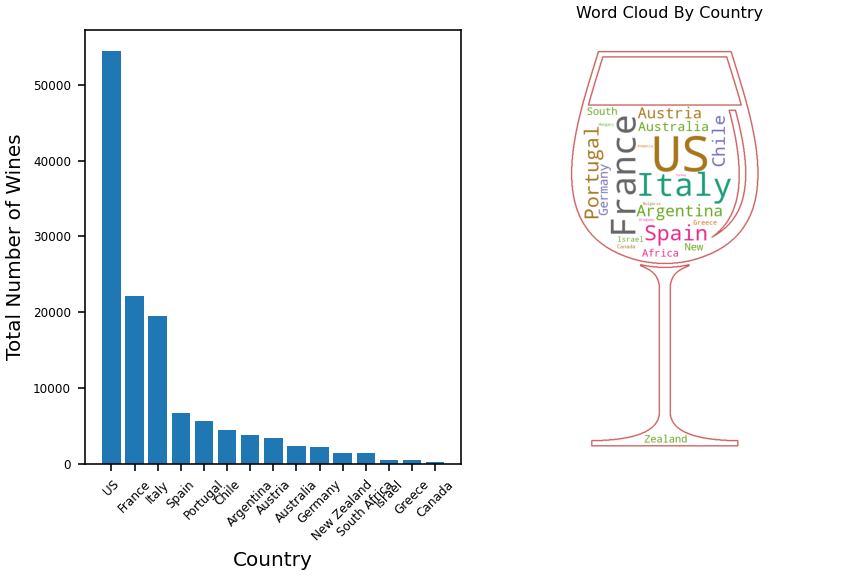

In [36]:
# Creating a Panel Dashboard
pn.extension()
pn.GridSpec(sizing_mode='stretch_both', max_height=800)

pn.pane.HTML(background='#f307eb', width=100, height=100)
kw = dict(x_column = ['country','variety','taster_name'])

dash1 = pn.interact(create_figure, **kw)
dash1

### Contextual Database:
Source: https://www.realsimple.com/holidays-entertaining/entertaining/food-drink/alcohol-content-wine
The dataset needs to be scraped from website. Alcohol content can help us tell if quality is proportional to alcohol content and help us ascertain if quality tasters were biased towards high alcohol content, hence justifying the reviews given by the tasters.